In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Data_Train.xlsx')

In [3]:
df.head(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,Null,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,Null,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,Null,8625


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
df.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,Null
freq,3849,504,4537,4537,2376,233,423,550,5625,8347


In [7]:
df.describe(include='O').T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,Null,8347


In [8]:
for i in df.columns:
    unique_values = df[i].unique()
    print(f'The unique values in feature {i} is: ', unique_values)
    print('\n***************************************************************************************************\n')

The unique values in feature Airline is:  ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']

***************************************************************************************************

The unique values in feature Date_of_Journey is:  ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']

**********************************************

In [9]:
def preprocess(data):
    data.dropna(inplace = True)# This will drop all rows containing at least one NaN value, Null values.
    data.drop_duplicates(inplace = True)
    
    data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
    #Pandas to_datetime() method helps to convert string Date time into Python Date time object.
    data['day'] = pd.DatetimeIndex(data['Date_of_Journey']).day
    data['month'] = pd.DatetimeIndex(data['Date_of_Journey']).month
    data['weekday'] = pd.DatetimeIndex(data['Date_of_Journey']).weekday
    data.drop(['Date_of_Journey'], axis =1, inplace = True)
    
    data['Total_Stops'] = data['Total_Stops'].replace('non-stop', eval('0'))
    data['Total_Stops'] = data['Total_Stops'].replace('1 stop', eval('1'))
    data['Total_Stops'] = data['Total_Stops'].replace('2 stops', eval('2'))
    data['Total_Stops'] = data['Total_Stops'].replace('3 stops', eval('3'))
    data['Total_Stops'] = data['Total_Stops'].replace('4 stops', eval('4'))
    
    data['Destination'] = np.where(data['Destination'] == 'New Delhi', 'Delhi', data['Destination'])
    data['Airline'] = np.where(data['Airline'] == 'Jet Airways Business','Jet Airways',data['Airline'])
    data['Airline'] = np.where(data['Airline'] == 'Vistara Premium economy','Vistara',data['Airline'])
    data['Airline'] = np.where(data['Airline'] == 'Multiple carriers Premium economy','Multiple carriers',data['Airline'])
    
    arrival_time = []
    for i in data["Arrival_Time"]:
        arrival_time.append(i[:5])
    data['Arrival_Time'] = arrival_time
    data['Arrival_Time_hour'] = pd.DatetimeIndex(data['Arrival_Time']).hour
    data['Arrival_Time_minutes'] = pd.DatetimeIndex(data['Arrival_Time']).minute
    data.drop(['Arrival_Time'], axis = 1, inplace = True)
    
    data['Departure_Time_hour'] = pd.DatetimeIndex(data['Dep_Time']).hour
    data['Departure_Time_minutes'] = pd.DatetimeIndex(data['Dep_Time']).minute
    data.drop(['Dep_Time'], axis = 1, inplace = True)
    
    """
    The function eval() is a built-in function that takes an expression as an input and returns the result of the
    expression on evaluation.
    """
    data['Duration_Total_Hour'] = round(data['Duration'].str.replace('h','*1').str.replace(' ','+').str.replace('m','/60').apply(eval),4)
    data.drop(['Duration'], axis = 1, inplace = True)
    
    # we often convert categorical variables to dummy variables, which are numeric variables that are used to represent categorical data.
    # drop_first: Remove first level to get k-1 dummies out of k categorical levels.
    data1 = pd.get_dummies(data, prefix=['Airline','Source','Destination'],columns = ['Airline','Source','Destination'], drop_first = True)
    
    data1.drop(['Additional_Info','Route'], axis =1, inplace = True)
    return data, data1
    

What is the Dummy Variable Trap?

The Dummy Variable Trap occurs when two or more dummy variables created by one-hot encoding are highly correlated (multi-collinear). This means that one variable can be predicted from the others, making it difficult to interpret predicted coefficient variables in regression models. In other words, the individual effect of the dummy variables on the prediction model can not be interpreted well because of multicollinearity.

One of the assumptions of a regression model is that the observations must be independent of each other. Multicollinearity occurs when independent variables in a regression model are correlated.
Multicollinearity is undesirable, and every time we encode variables with pandas.get_dummies(), we’ll encounter this issue. One way to overcome this problem is by dropping the first column.
If all the variables are correlated, it will become difficult for the model to tell how strongly a particular variable affects the target since all the variables are related. In such a case, the coefficient of a regression model will not convey the correct information.


In [10]:
data_eda, data_model = preprocess(df)

In [11]:
data_eda.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day,month,weekday,Arrival_Time_hour,Arrival_Time_minutes,Departure_Time_hour,Departure_Time_minutes,Duration_Total_Hour
0,IndiGo,Banglore,Delhi,BLR → DEL,0,Null,3897,24,3,6,1,10,22,20,2.8333
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,Null,7662,5,1,5,13,15,5,50,7.4167
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,Null,13882,6,9,4,4,25,9,25,19.0000
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,Null,6218,5,12,3,23,30,18,5,5.4167
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1,Null,13302,3,1,3,21,35,16,50,4.7500


In [12]:
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airline                 10462 non-null  object 
 1   Source                  10462 non-null  object 
 2   Destination             10462 non-null  object 
 3   Route                   10462 non-null  object 
 4   Total_Stops             10462 non-null  int64  
 5   Additional_Info         10462 non-null  object 
 6   Price                   10462 non-null  int64  
 7   day                     10462 non-null  int64  
 8   month                   10462 non-null  int64  
 9   weekday                 10462 non-null  int64  
 10  Arrival_Time_hour       10462 non-null  int64  
 11  Arrival_Time_minutes    10462 non-null  int64  
 12  Departure_Time_hour     10462 non-null  int64  
 13  Departure_Time_minutes  10462 non-null  int64  
 14  Duration_Total_Hour     10462 non-null

In [13]:
data_model.head()

,Total_Stops,Price,day,month,weekday,Arrival_Time_hour,Arrival_Time_minutes,Departure_Time_hour,Departure_Time_minutes,Duration_Total_Hour,...,Airline_Trujet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,6,1,10,22,20,2.8333,...,0,0,0,0,0,0,0,1,0,0
1,2,7662,5,1,5,13,15,5,50,7.4167,...,0,0,0,0,1,0,0,0,0,0
2,2,13882,6,9,4,4,25,9,25,19.0000,...,0,0,0,1,0,0,1,0,0,0
3,1,6218,5,12,3,23,30,18,5,5.4167,...,0,0,0,0,1,0,0,0,0,0
4,1,13302,3,1,3,21,35,16,50,4.7500,...,0,0,0,0,0,0,0,1,0,0


In [14]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Total_Stops                10462 non-null  int64  
 1   Price                      10462 non-null  int64  
 2   day                        10462 non-null  int64  
 3   month                      10462 non-null  int64  
 4   weekday                    10462 non-null  int64  
 5   Arrival_Time_hour          10462 non-null  int64  
 6   Arrival_Time_minutes       10462 non-null  int64  
 7   Departure_Time_hour        10462 non-null  int64  
 8   Departure_Time_minutes     10462 non-null  int64  
 9   Duration_Total_Hour        10462 non-null  float64
 10  Airline_Air India          10462 non-null  uint8  
 11  Airline_GoAir              10462 non-null  uint8  
 12  Airline_IndiGo             10462 non-null  uint8  
 13  Airline_Jet Airways        10462 non-null  uin

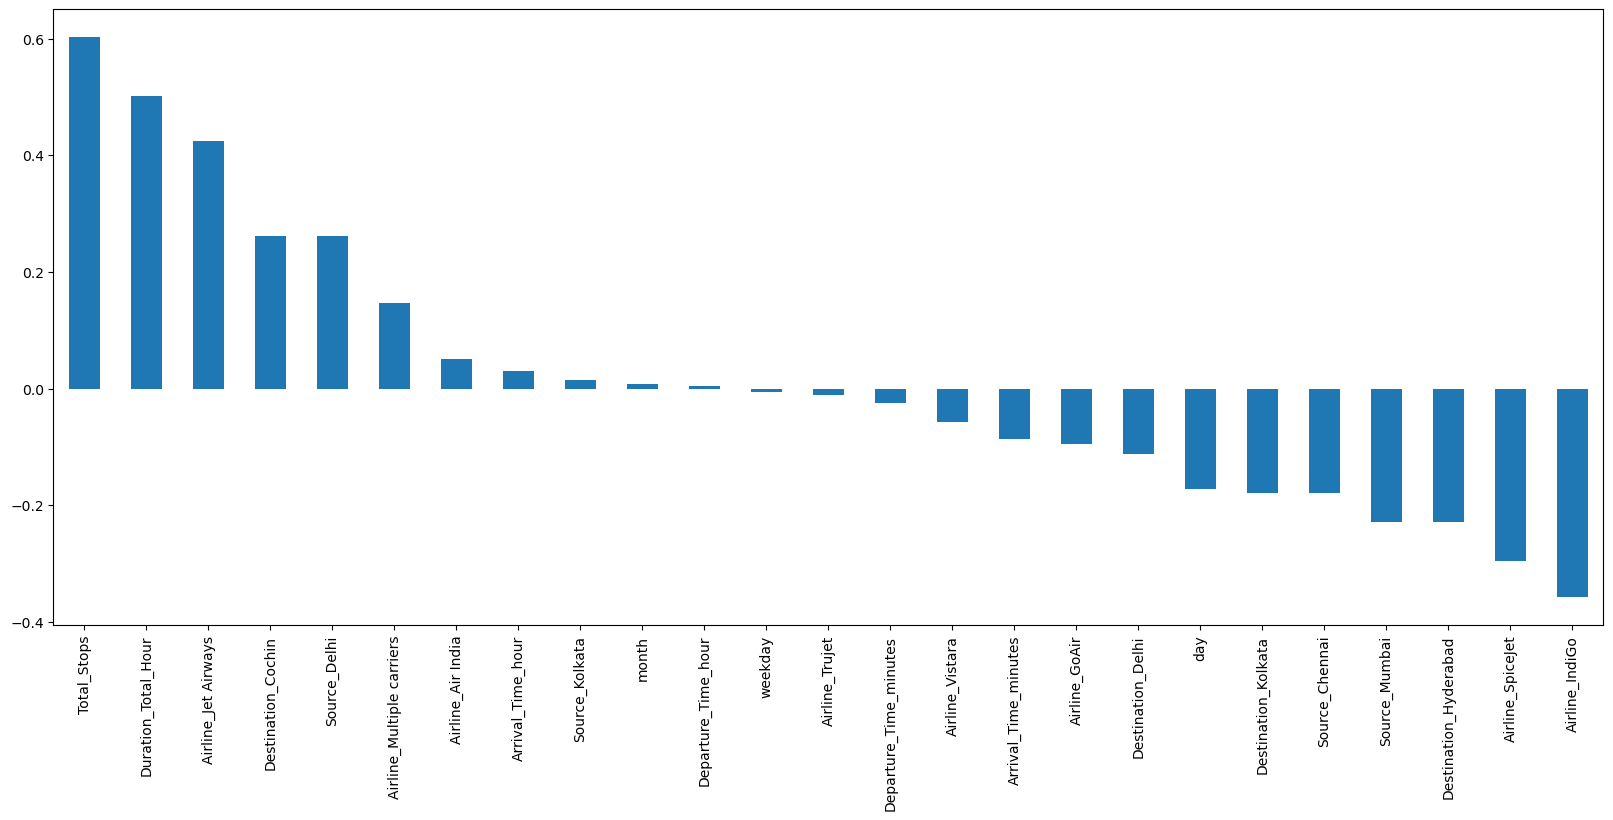

In [15]:
plt.figure(figsize=(20,8))
data_model.corr()['Price'].sort_values(ascending=False)[1:].plot(kind='bar')
plt.show()

In [16]:
data_eda.isnull().sum()

Airline                   0
Source                    0
Destination               0
Route                     0
Total_Stops               0
Additional_Info           0
Price                     0
day                       0
month                     0
weekday                   0
Arrival_Time_hour         0
Arrival_Time_minutes      0
Departure_Time_hour       0
Departure_Time_minutes    0
Duration_Total_Hour       0
dtype: int64

In [17]:
data_eda["Additional_Info"].value_counts()

Null                            8184
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
Null                               1
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

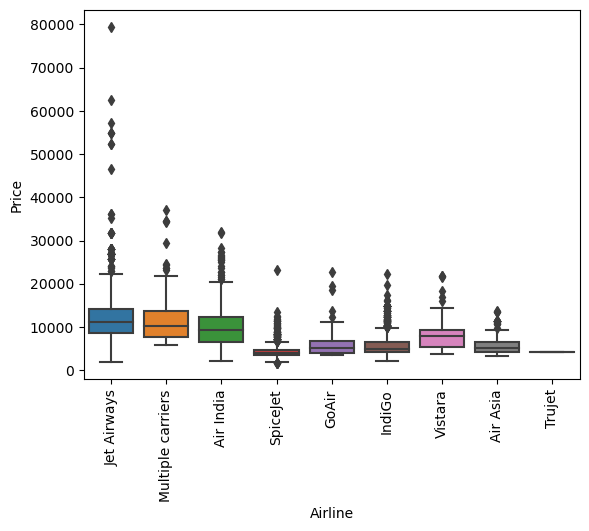

In [18]:
#Plotting Price vs Airline plot

sns.boxplot(y = "Price", x = "Airline", data = data_eda.sort_values("Price", ascending = False))
plt.xticks(rotation=90)
plt.show()

Inference: Here with the help of the cat plot we are trying to plot the boxplot between the price of the flight and airline and we can conclude that Jet Airways has the most outliers in terms of price.

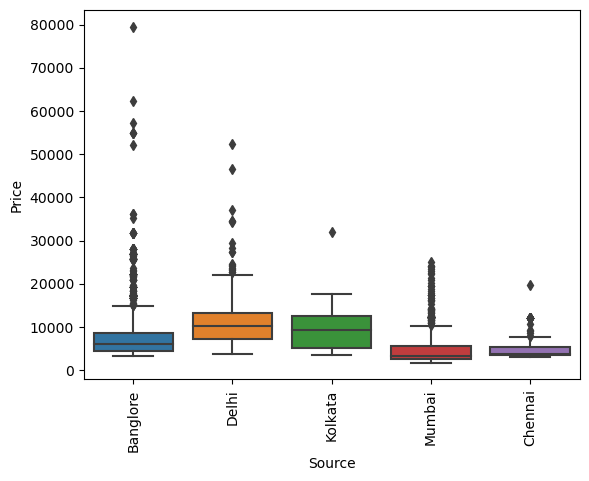

In [19]:
#Plotting plot for Price vs Source

sns.boxplot(y = "Price", x = "Source", data = data_eda.sort_values("Price", ascending = False))
plt.xticks(rotation=90)
plt.show()

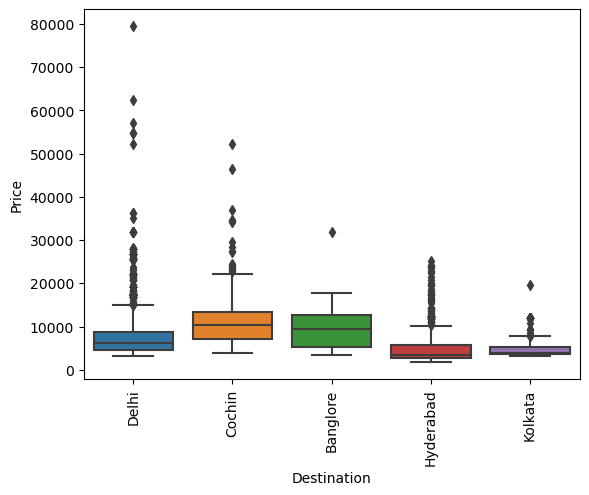

In [20]:
#Plotting Box plot for Price vs Destination

sns.boxplot(y = "Price", x = "Destination", data = data_eda.sort_values("Price", ascending = False))
plt.xticks(rotation=90)
plt.show()

Inference: Here in the above graph we have plotted the count plot for journey in a month vs several flights and got to see that Jun has the most number of flights.

#### Univarite Analysis

In [21]:
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airline                 10462 non-null  object 
 1   Source                  10462 non-null  object 
 2   Destination             10462 non-null  object 
 3   Route                   10462 non-null  object 
 4   Total_Stops             10462 non-null  int64  
 5   Additional_Info         10462 non-null  object 
 6   Price                   10462 non-null  int64  
 7   day                     10462 non-null  int64  
 8   month                   10462 non-null  int64  
 9   weekday                 10462 non-null  int64  
 10  Arrival_Time_hour       10462 non-null  int64  
 11  Arrival_Time_minutes    10462 non-null  int64  
 12  Departure_Time_hour     10462 non-null  int64  
 13  Departure_Time_minutes  10462 non-null  int64  
 14  Duration_Total_Hour     10462 non-null

Jet Airways          3706
IndiGo               2043
Air India            1694
Multiple carriers    1209
SpiceJet              815
Vistara               481
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64


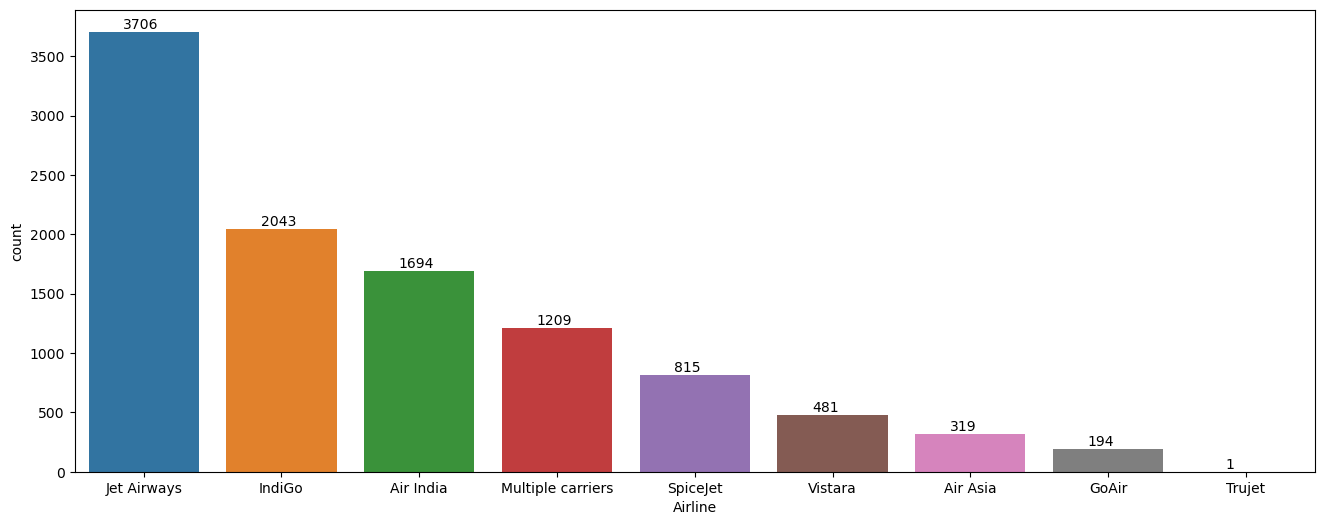

In [22]:
# Airlines distribution
plt.figure(figsize=(16,6))
print(data_eda["Airline"].value_counts())
ax=sns.countplot(x='Airline', data=data_eda, order=data_eda["Airline"].value_counts().index)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
plt.show()

Inference: Now from the above graph we can see that between the type of airline and count of flights we can see that Jet Airways has the most flight boarded.

Cochin       4345
Banglore     2860
Delhi        2179
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


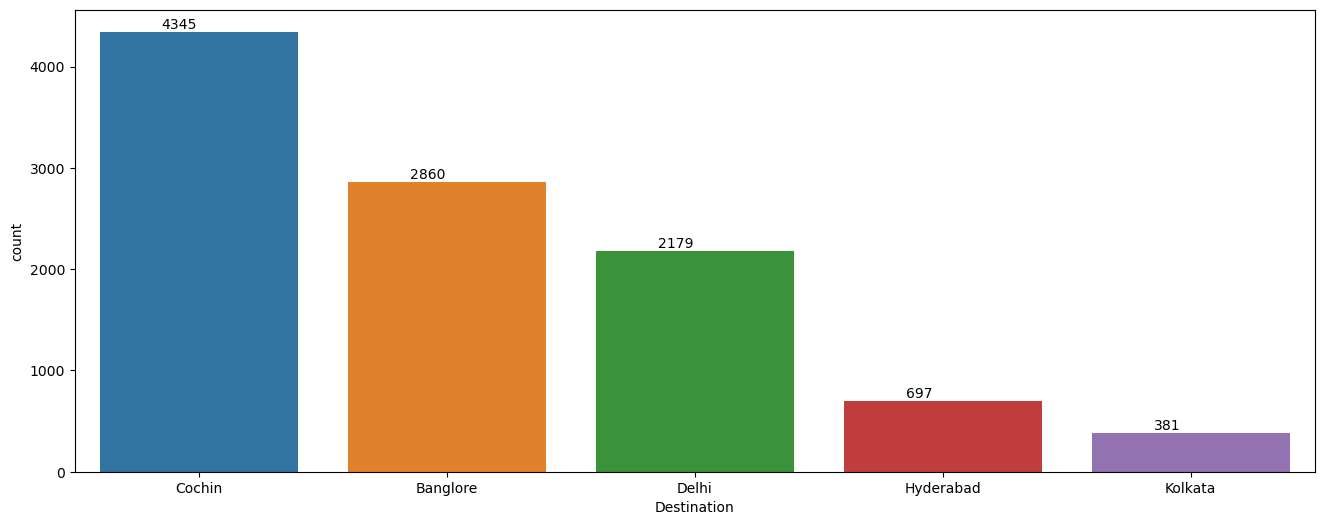

In [23]:
# Destination Distribution
plt.figure(figsize=(16,6))
print(data_eda["Destination"].value_counts())
ax=sns.countplot(x='Destination', data=data_eda, order=data_eda["Destination"].value_counts().index)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
plt.show()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64


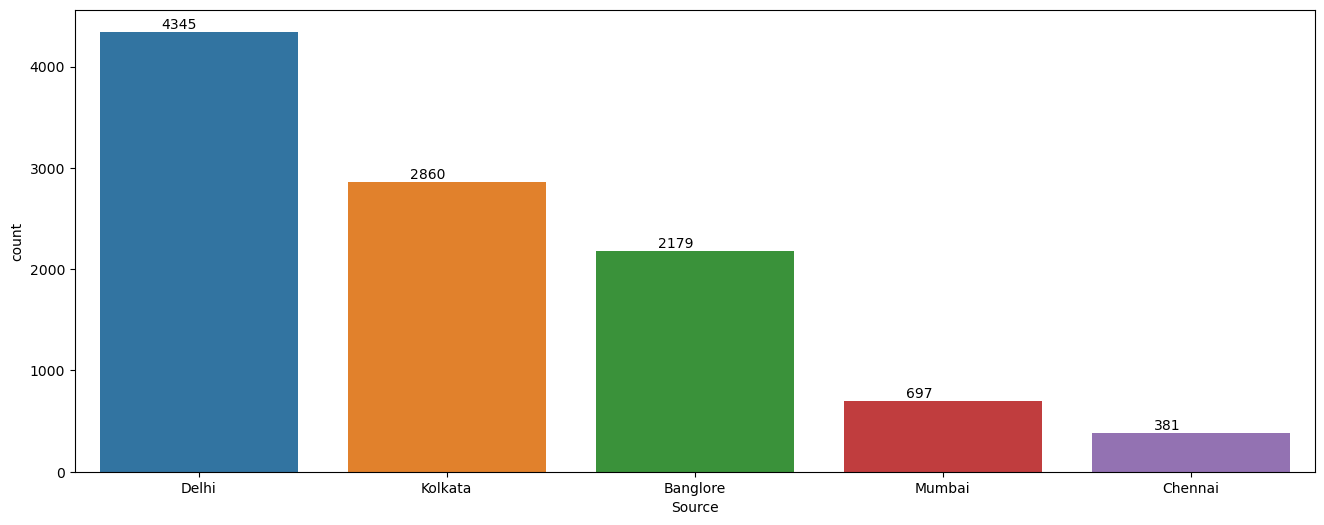

In [24]:
# Sourse Distribution
plt.figure(figsize=(16,6))
print(data_eda["Source"].value_counts())
ax=sns.countplot(x='Source', data=data_eda, order=data_eda["Source"].value_counts().index)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
plt.show()

1    5625
0    3475
2    1318
3      43
4       1
Name: Total_Stops, dtype: int64


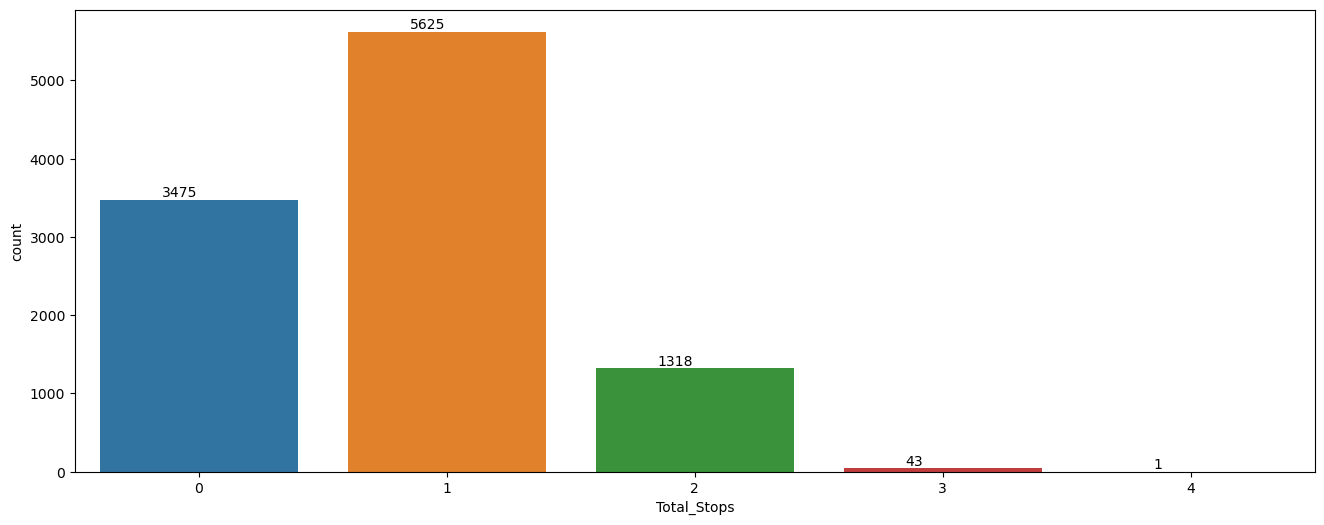

In [25]:
# Total Stops Distribution
plt.figure(figsize=(16,6))
print(data_eda["Total_Stops"].value_counts())
ax=sns.countplot(x='Total_Stops', data=data_eda)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
plt.show()

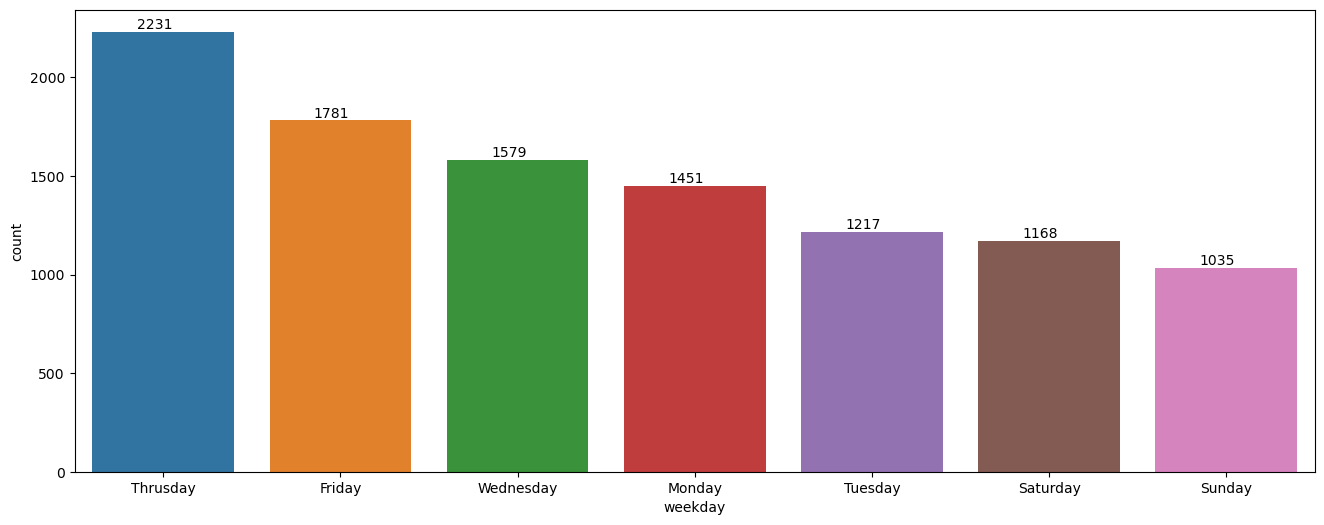

In [26]:
# Weekday
plt.figure(figsize=(16,6))
#print(data_eda["Journey_weekday"].value_counts())
ax = sns.countplot(x='weekday', data=data_eda, order=data_eda["weekday"].value_counts().index)
new_labels = ["Thrusday","Friday","Wednesday","Monday","Tuesday","Saturday","Sunday"]
ax.set_xticklabels(new_labels)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
plt.show()

6     2465
3     2169
5     2025
9     1375
1     1058
12     946
4      424
Name: month, dtype: int64


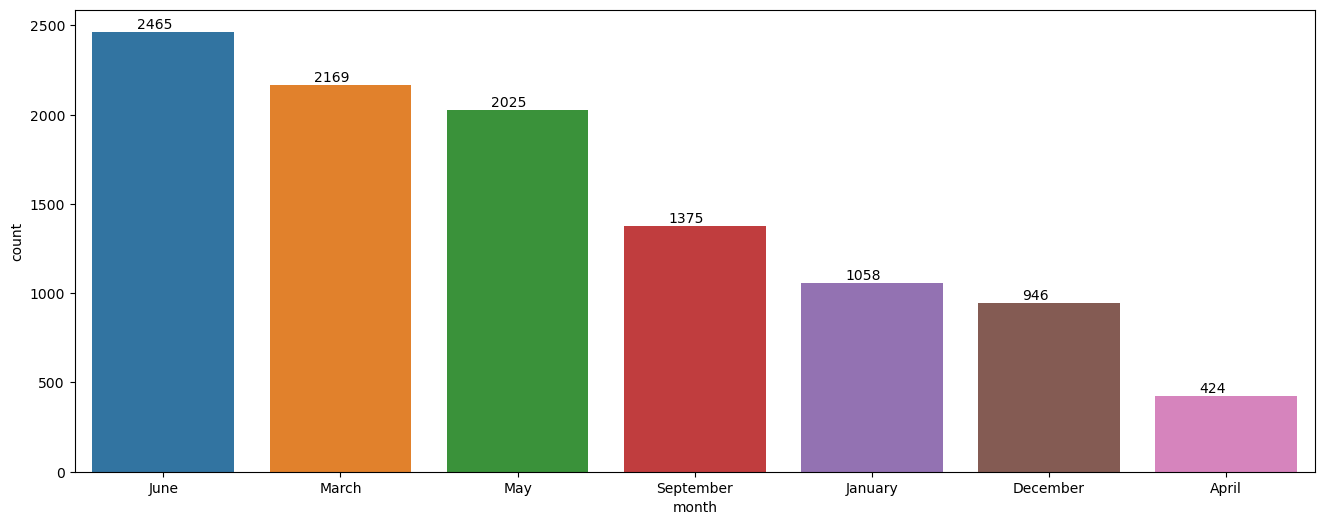

In [27]:
# Months
plt.figure(figsize=(16,6))
print(data_eda["month"].value_counts())
ax = sns.countplot(x='month', data=data_eda, order=data_eda["month"].value_counts().index)
new_labels = ["June","March","May","September","January","December","April"]
ax.set_xticklabels(new_labels)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
plt.show()

#### Bivariate Analysis

<Figure size 1000x400 with 0 Axes>

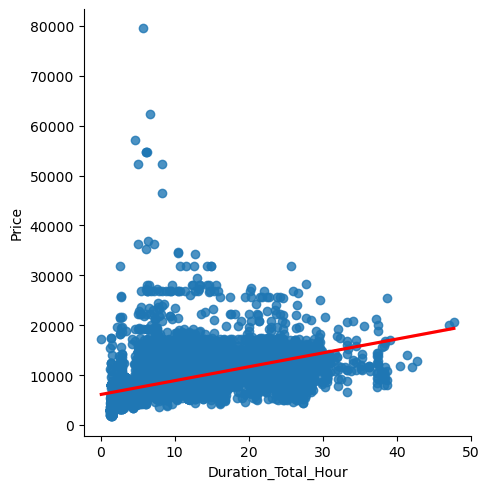

In [28]:
# plot for Flights Total Duration vs Price
plt.figure(figsize=(10,4))
sns.lmplot(x="Duration_Total_Hour",y="Price",data=data_eda, line_kws={"color":"red"})
plt.show()

             Airline  Duration_Total_Hour
0           Air Asia            1851.6646
1          Air India           26169.8267
2              GoAir             966.6686
3             IndiGo            9736.8201
4        Jet Airways           51272.4171
5  Multiple carriers           12605.0821
6           SpiceJet            2424.8317
7             Trujet               3.2500
8            Vistara            4782.3331


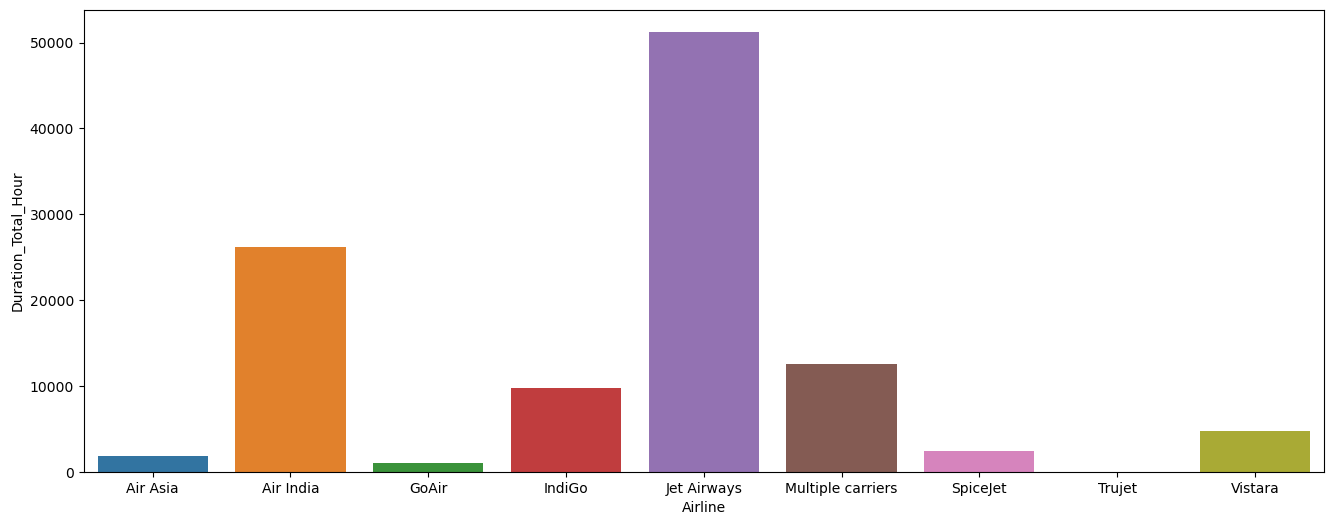

In [29]:
# Overall Duration Distribution by airline
airline_dur = data_eda.groupby("Airline")["Duration_Total_Hour"].sum().reset_index()
df = pd.DataFrame(airline_dur)
print(df)
plt.figure(figsize=(16,6))
sns.barplot(x="Airline",y="Duration_Total_Hour",data=df)
plt.show()

<Axes: xlabel='month', ylabel='Price'>

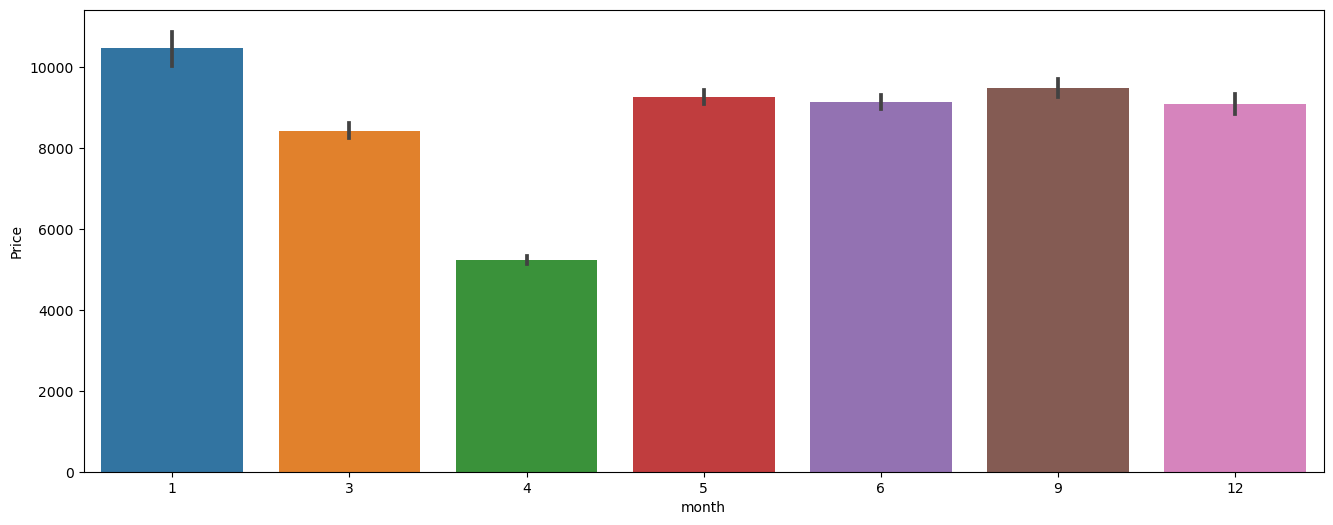

In [30]:
# Price variation by month
plt.figure(figsize=(16,6))
sns.barplot(x="month",y="Price",data=data_eda)

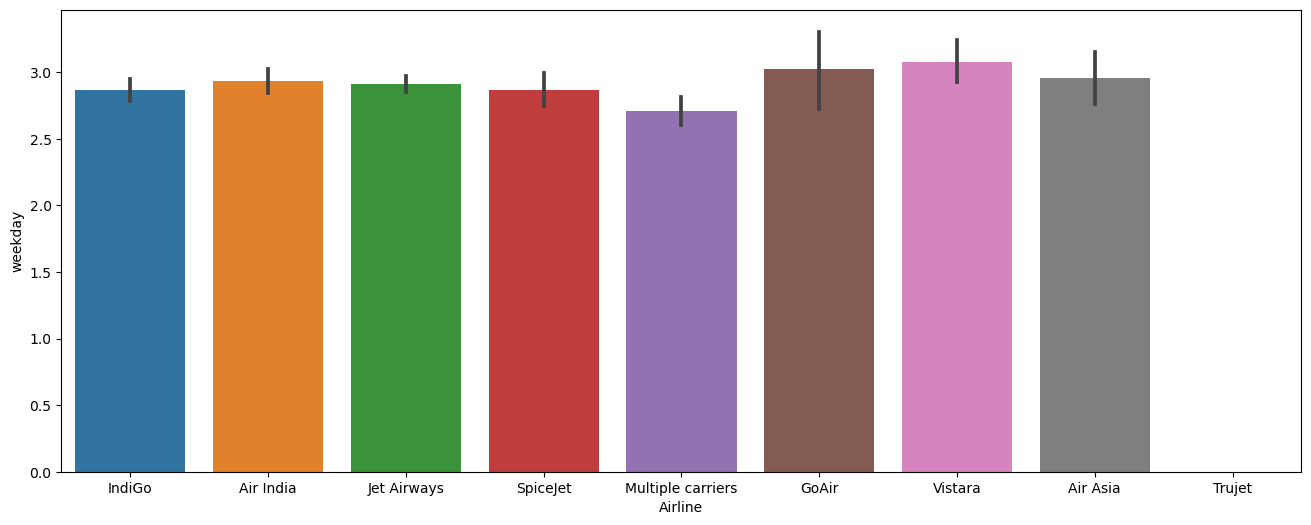

In [31]:
# plot for Travels in weekdays by Airlines
plt.figure(figsize=(16,6))
ax = sns.barplot(y="weekday", x="Airline", data=data_eda)
# new_labels = ["Monday","Tuesday","Wednesday","Thrusday","Friday","Saturday","Sunday"]
# ax.set_xticklabels(new_labels)
plt.show()

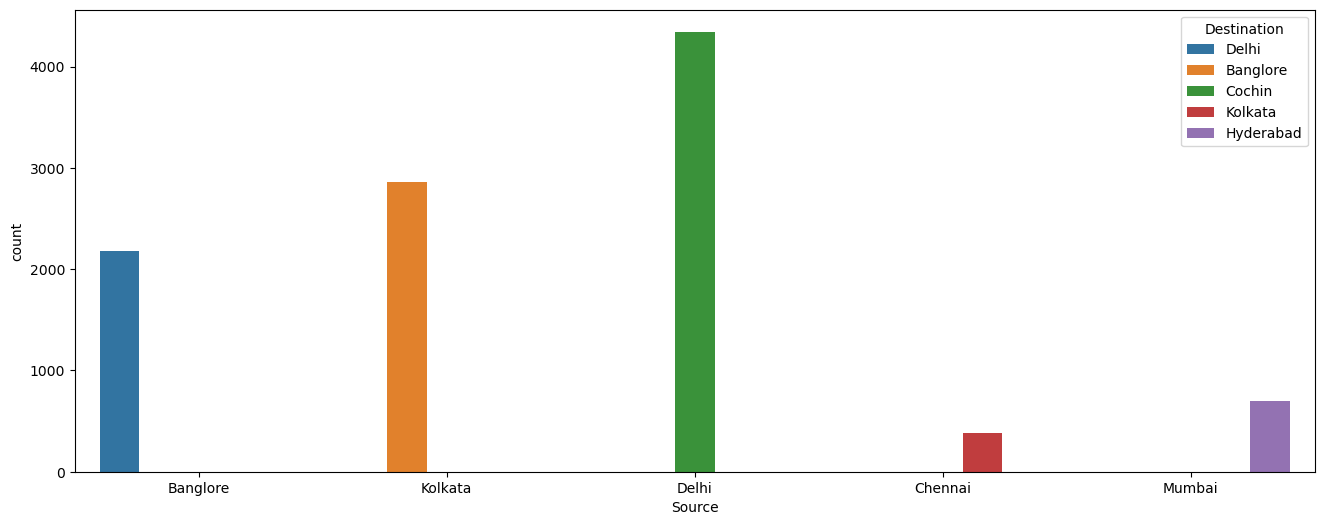

In [32]:
# Flights running from different Sources to Destinations
plt.figure(figsize=(16,6))
sns.countplot(x="Source", hue="Destination",data=data_eda)
plt.show()

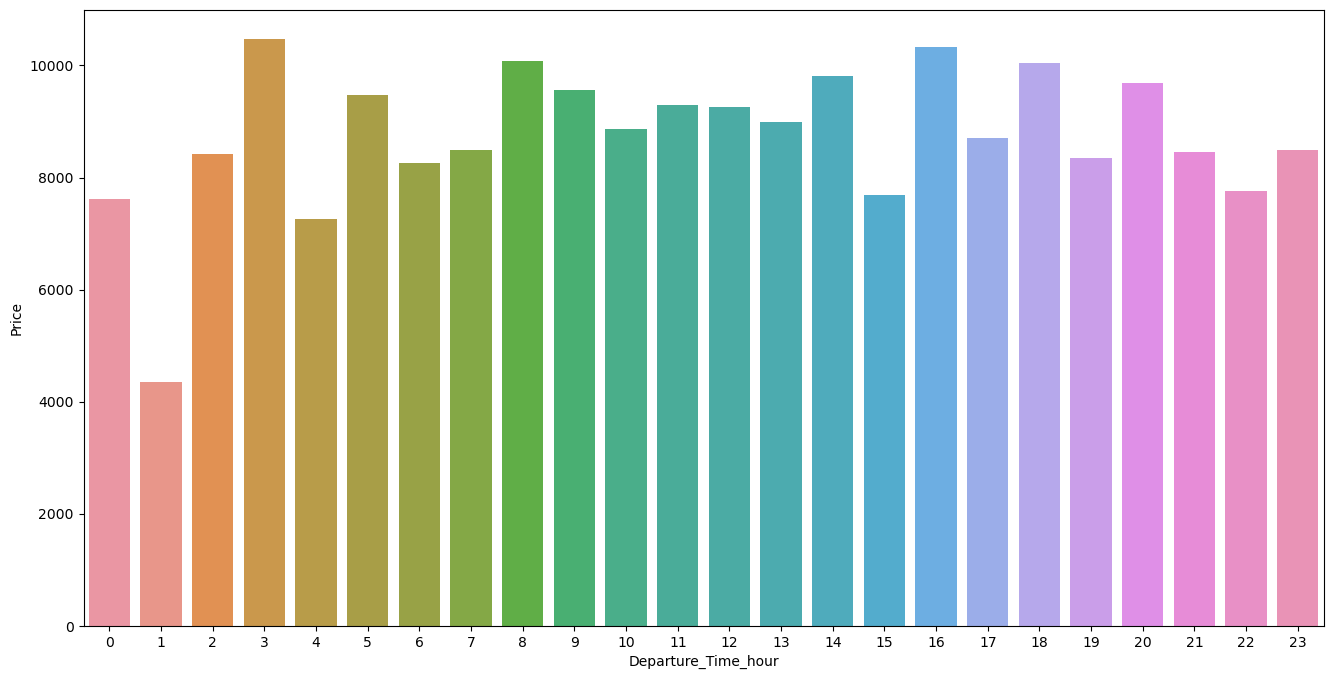

In [33]:
# Price vs Departure hours
plt.figure(figsize=(16,8))
sns.barplot(x="Departure_Time_hour", y="Price",data=data_eda,ci=None, )
plt.show()

In [34]:
def source_extract(data,column):
    for i in data[column].unique():
        source=data[data[column]==i]
        source_grp=source.groupby([column,'Airline','Destination'])['Price'].mean().reset_index()
        print("---------------------------------------------------------------------------------")
        print(source_grp)

In [35]:
s = source_extract(data_eda,"Source")

---------------------------------------------------------------------------------
     Source      Airline Destination         Price
0  Banglore     Air Asia       Delhi   4574.280899
1  Banglore    Air India       Delhi   9208.443769
2  Banglore        GoAir       Delhi   4948.881720
3  Banglore       IndiGo       Delhi   5245.563353
4  Banglore  Jet Airways       Delhi  11288.587863
5  Banglore     SpiceJet       Delhi   4542.679775
6  Banglore      Vistara       Delhi   6215.381720
---------------------------------------------------------------------------------
    Source      Airline Destination         Price
0  Kolkata     Air Asia    Banglore   5012.320000
1  Kolkata    Air India    Banglore  10296.273453
2  Kolkata        GoAir    Banglore   7047.000000
3  Kolkata       IndiGo    Banglore   5075.235955
4  Kolkata  Jet Airways    Banglore  11717.565287
5  Kolkata     SpiceJet    Banglore   4642.883333
6  Kolkata      Vistara    Banglore   9257.683060
----------------------------

In [36]:
total_Stop = data_eda.groupby(["Total_Stops"])["Price"].mean().sort_values(ascending = False).reset_index()

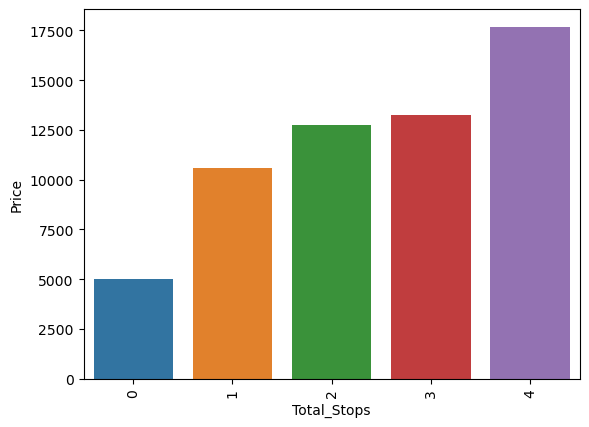

In [37]:
### flights with four stops are more expensive
sns.barplot(data = total_Stop, x = "Total_Stops", y = "Price")
plt.xticks(rotation=90)
plt.show()

#### Modelling

In [38]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Total_Stops                10462 non-null  int64  
 1   Price                      10462 non-null  int64  
 2   day                        10462 non-null  int64  
 3   month                      10462 non-null  int64  
 4   weekday                    10462 non-null  int64  
 5   Arrival_Time_hour          10462 non-null  int64  
 6   Arrival_Time_minutes       10462 non-null  int64  
 7   Departure_Time_hour        10462 non-null  int64  
 8   Departure_Time_minutes     10462 non-null  int64  
 9   Duration_Total_Hour        10462 non-null  float64
 10  Airline_Air India          10462 non-null  uint8  
 11  Airline_GoAir              10462 non-null  uint8  
 12  Airline_IndiGo             10462 non-null  uint8  
 13  Airline_Jet Airways        10462 non-null  uin

In [39]:
data_model.shape

(10462, 26)

In [40]:
# Divided the data into two part x and y. Where, x is independent variable and y is dependent variable or target variable 
#X = data_model.drop(columns=['Price']).values  
#y = data_model['Price'].values

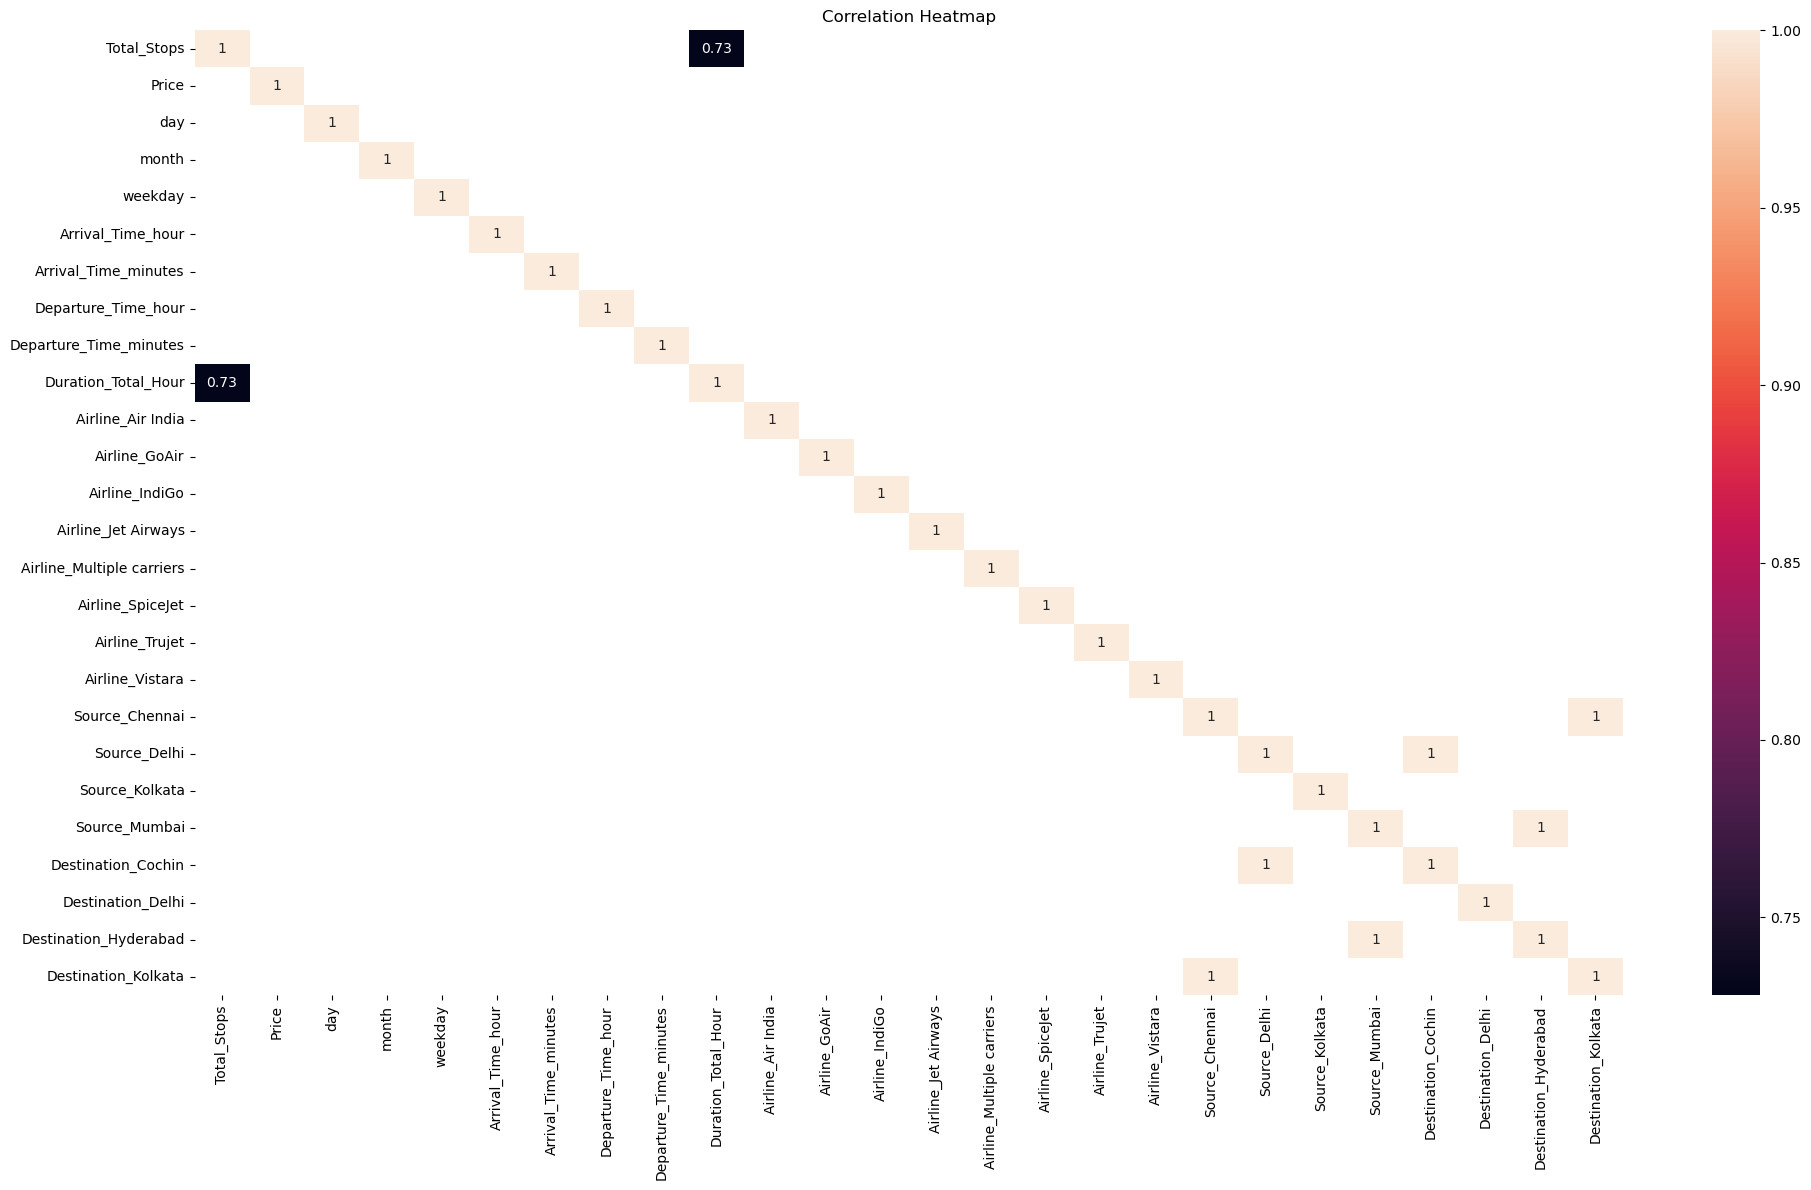

In [41]:
corr_mat = data_model.corr()

# Select correlations greater than 0.5
high_corr_mat = corr_mat[abs(corr_mat) >= 0.7]

# Plot correlation heatmap
fig, ax = plt.subplots(1,1, figsize = (20,12))
sns.heatmap(high_corr_mat,annot=True)
title = plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


In [42]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [43]:
corr_features = correlation(data_model, 0.7)
print(len(set(corr_features)))
print(corr_features)

4
{'Destination_Cochin', 'Duration_Total_Hour', 'Destination_Kolkata', 'Destination_Hyderabad'}


In [44]:
# Divided the data into two part x and y. Where, x is independent variable and y is dependent variable or target variable 
X = data_model.drop(columns=['Price']).values  
y = data_model['Price'].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Why we use fit_transform() on training data but transform() on the test data?

fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data. Here, the model built by us will learn the mean and variance of the features of the training set. These learned parameters are then used to scale our test data.

The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.

Now, we want scaling to be applied to our test data too and at the same time do not want to be biased with our model. We want our test data to be a completely new and a surprise set for our model. The transform method helps us in this case.

Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data. Thus, the parameters learned by our model using the training data will help us to transform our test data.

If we will use the fit method on our test data too, we will compute a new mean and variance that is a new scale for each feature and will let our model learn about our test data too. Thus, what we want to keep as a surprise is no longer unknown to our model and we will not get a good estimate of how our model is performing on the test (unseen) data which is the ultimate goal of building a model using machine learning algorithm.

In [46]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [47]:
X_test=scaler.transform(X_test)

 ### Without xgboost 

In [51]:
regression=LinearRegression(n_jobs=-1)

In [52]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [58]:
model_score_train = regression.score(X_train, y_train)
print("Training score: ",model_score_train)
model_score_test = regression.score(X_test, y_test)
print("Testing score: ",model_score_test)

Training score:  0.5404877028046517
Testing score:  0.5628795673829877


In [55]:
## Prediction for test data
y_pred=regression.predict(X_test)

In [56]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

9021680.441067036
2036.683530103247
3003.6112333434626


R^2
Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination ......
SSR = sum of squares of residuals........ 
SST = total sum of squares

In [57]:
score=r2_score(y_test,y_pred)
print(score)

0.5628795673829877


Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

In [59]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5575926729391438

In [60]:
## OLS Linear Regression
import statsmodels.api as sm

In [61]:
model=sm.OLS(y_train,X_train).fit()

In [62]:
prediction=model.predict(X_test)
print(prediction)

[-2920.78384121  1955.51598436  1201.7054706  ... -5868.65064717
 -3501.6180447  -5221.01931863]


In [63]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.113
Model:                            OLS   Adj. R-squared (uncentered):              0.111
Method:                 Least Squares   F-statistic:                              50.59
Date:                Tue, 07 Nov 2023   Prob (F-statistic):                   1.64e-198
Time:                        19:42:26   Log-Likelihood:                         -88591.
No. Observations:                8369   AIC:                                  1.772e+05
Df Residuals:                    8348   BIC:                                  1.774e+05
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2199.2847    180.833     12.162      0.000    1844.808    2553.761
x2          -775.6578    110.942     -6.992      0.000    -993.132    -558.184
x3          -429.2318    111.897     -3.836      0.000    -648.578    -209.885
x4          -169.5476    109.016     -1.555      0.120    -383.247      44.151
x5          -107.0282    108.368     -0.988      0.323    -319.457     105.400
x6            61.3037    111.372      0.550      0.582    -157.013     279.621
x7           135.2327    108.117      1.251      0.211     -76.703     347.169
x8            19.9948    109.896      0.182      0.856    -195.428     235.418
x9            36.3115    165.605      0.219      0.826    -288.315     360.938
x10          605.2164    254.473      2.378      0.017     106.386    1104.047
x11           -8.6848    132.532     -0.066      0.948    -268.481     251.112
x12          157.5017    257.810      0.611      0.541    -347.870     662.873
x13         2158.4202    307.626      7.016      0.000    1555.397    2761.444
x14         1225.4028    227.794      5.379      0.000     778.870    1671.935
x15          -26.9173    188.093     -0.143      0.886    -395.627     341.792
x16          -29.2743    105.177     -0.278      0.781    -235.448     176.899
x17          458.0808    166.506      2.751      0.006     131.687     784.475
x18           23.6183     53.821      0.439      0.661     -81.884     129.121
x19          -53.3255     53.651     -0.994      0.320    -158.495      51.844
x20          -84.0216     73.424     -1.144      0.253    -227.951      59.908
x21         -177.7062     53.078     -3.348      0.001    -281.753     -73.660
x22          -53.3255     53.651     -0.994      0.320    -158.495      51.844
x23          253.5323     83.405      3.040      0.002      90.037     417.028
x24         -177.7062     53.078     -3.348      0.001    -281.753     -73.660
x25           23.6183     53.821      0.439      0.661     -81.884     129.121
==============================================================================
Omnibus:                     7358.144   Durbin-Watson:                   0.219
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           790390.456
Skew:                           3.731   Prob(JB):                         0.00
Kurtosis:                      50.021   Cond. No.                     2.56e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.82e-29. This might indicate that there are
strong multicollinearity pr

 ### With xgboost 

In [91]:
# XGBoost for regressor
reg = xgb.XGBRegressor()

In [69]:
hyperparameter_grid = {
    'n_estimators': [100, 400, 500, 600],
    'max_depth': [3, 4, 5, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.20],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

random_search = RandomizedSearchCV(reg,param_distributions=hyperparameter_grid,n_iter=20,scoring='r2',n_jobs=-1,cv=5)

In [71]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [74]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable
print("\nThe best hyperparameters are ",random_search.best_params_)


 Time taken: 0 hours 0 minutes and 29.32 seconds.

The best hyperparameters are  {'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.4, 'colsample_bytree': 0.5}


In [75]:
random_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.4, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [77]:
reg = xgb.XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.4, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=3, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None)

In [79]:
#View the parameters in more readable format

print('Parameters currently in use:\n')
for key, value in reg.get_params().items():
    print(f"{key}: {value}")

Parameters currently in use:

objective: reg:squarederror
base_score: None
booster: None
callbacks: None
colsample_bylevel: None
colsample_bynode: None
colsample_bytree: 0.5
device: None
early_stopping_rounds: None
enable_categorical: False
eval_metric: None
feature_types: None
gamma: 0.4
grow_policy: None
importance_type: None
interaction_constraints: None
learning_rate: 0.1
max_bin: None
max_cat_threshold: None
max_cat_to_onehot: None
max_delta_step: None
max_depth: 9
max_leaves: None
min_child_weight: 3
missing: nan
monotone_constraints: None
multi_strategy: None
n_estimators: 100
n_jobs: None
num_parallel_tree: None
random_state: None
reg_alpha: None
reg_lambda: None
sampling_method: None
scale_pos_weight: None
subsample: None
tree_method: None
validate_parameters: None
verbosity: None


In [80]:
reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.4, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [81]:
print("Accuracy = {} ".format(reg.score(X_test, y_test)))

Accuracy = 0.837879313264051 


In [85]:
model_score_train1 = reg.score(X_train, y_train)
print("Training score: ",model_score_train1)
model_score_test1 = reg.score(X_test, y_test)
print("Testing score: ",model_score_test1)

Training score:  0.9414634126908942
Testing score:  0.837879313264051


In [88]:
pred_1 = reg.predict(X_test)
print('MAE: {}'.format(mean_absolute_error(y_test,pred_1)))
print('MSE: {}'.format(mean_squared_error(y_test,pred_1)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,pred_1))))

MAE: 1164.5335156786573
MSE: 3345990.9889399777
RMSE: 1829.2050155572988


R square value

In [89]:
score=r2_score(y_test,pred_1)
print(score)

0.837879313264051


Adjusted R-squared value

In [90]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8359184921859674

 ### With RandomForestRegressor

In [96]:
def predict(ml_model):
    print('Model name is: {}'.format(ml_model))
    model = ml_model.fit(X_train,y_train)
    print("Training Score: {}".format(model.score(X_train,y_train)))
    print("Testing score: {}".format(model.score(X_test, y_test)))
    
    predictions = model.predict(X_test)
    
    r2score = r2_score (y_test,predictions)
    print('R2 Score is: {}'.format(r2score))
    print('Adjusted R2 Score is: {}'.format(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)))
    
    print('MAE: {}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE: {}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,predictions))))

In [97]:
predict(RandomForestRegressor())

Model name is: RandomForestRegressor()
Training Score: 0.9503493234935881
Testing score: 0.7954675783384739
R2 Score is: 0.7954675783384739
Adjusted R2 Score is: 0.8359184921859674
MAE: 1190.263865969779
MSE: 4221322.112582597
RMSE: 2054.5856303845303
